- Step1 : Import all necessary libraries

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

- Step2 : Loadding data, Identifying dependent variable and data type of dependent/target variable

In [31]:
url= 'https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt'

In [32]:
data =pd.read_csv(url,sep=",")
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


### Use pandas to get some insights into the data (10 marks)

- Step3 : Data Cleaning, Data Wrangling and Data Preprocessing

In [33]:
data = data.drop('Unnamed: 0',axis=1)
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [37]:
data.shape

(645, 7)

In [46]:
data.drop_duplicates()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
639,2846.400,5,12,4,2,2,138888
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000


In [34]:
data.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [35]:
data.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

### Show some interesting visualization of the data (10 marks)

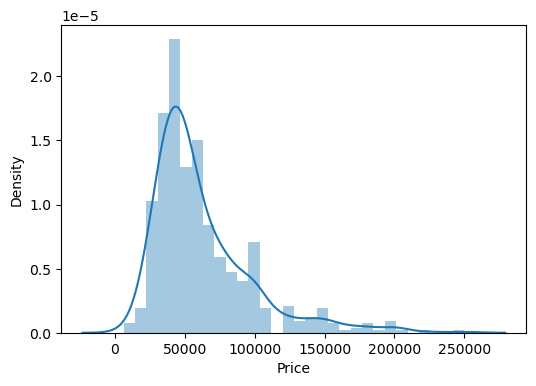

In [44]:
plt.figure(figsize=(6,4))
sns.distplot(data['Price'])
plt.show()

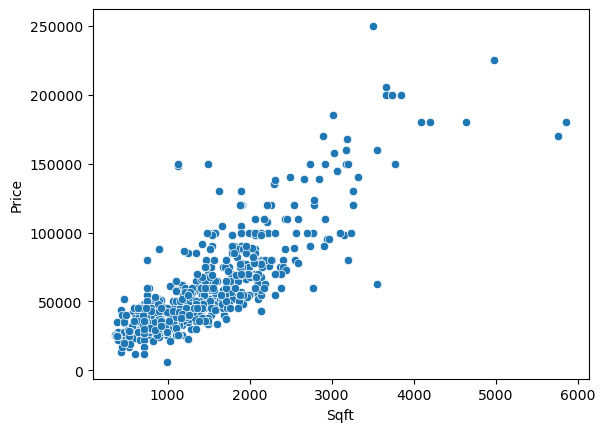

In [45]:
sns.scatterplot(x=data['Sqft'], y= data['Price'])
plt.show()

### Manage data for training & testing

- Step4 : Seperate independent and Dependent variable
         - In above data Price is dependent/Target variable.
         - Price is numerical data so apply regression algorithm.

In [48]:
x= data.drop('Price',axis=1)
y= data['Price']

In [50]:
x.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
0,1177.698,2,7,2,2,2
1,2134.800,5,7,4,2,2
2,1138.560,5,7,2,2,1
3,1458.780,2,7,3,2,2
4,967.776,11,14,3,2,2


In [51]:
y.head()

0    62000
1    78000
2    58000
3    45000
4    45000
Name: Price, dtype: int64

- Step5 : Split data into train and test set

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state =0)

- Step6 : Apply ML Algorithm on train set

In [57]:
from sklearn.neighbors import KNeighborsRegressor
knr= KNeighborsRegressor()
knr

KNeighborsRegressor()

In [58]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

- Step7 : Perform predictions on test set

In [59]:
y_pred = knr.predict(x_test)
y_pred

array([ 95399.8,  29419.8,  55000. ,  66000. ,  35400. , 122691.2,
       117199.8,  65800. ,  75720. ,  44359.8,  44600. ,  33400. ,
        26337.6,  49359.8,  39000. ,  99999.8,  43955.4,  46160. ,
        60200. ,  47319.8,  28600.4, 182000. ,  76400. ,  97399.8,
        55600. ,  66000. ,  76800. ,  54119.8,  88799.8,  52400. ,
       103999.8,  37700. ,  85200. , 115377.4,  47319.8,  44165.4,
        65800. ,  90400. ,  44600. ,  37880. ,  47319.8,  43955.4,
        76400. ,  53400. ,  93000. ,  39400. ,  58000. ,  38000. ,
       193000. ,  63000. , 191200. ,  61400. ,  33400. ,  37700. ,
        57280. ,  90400. ,  57600. ,  48800. , 106000. ,  68000. ,
        93000. ,  84000. ,  36200.4,  34360. , 103599.8,  98200. ,
        46160. ,  40160. ,  40905.6,  37700. ,  38600.4,  72999.8,
        60200. ,  63000. ,  97599.8,  35400. ,  38600. ,  49500. ,
        66000. ,  38900. ,  56760. ,  44600. ,  84000. ,  37806.4,
        53400. ,  44600. ,  83600. ,  54600. ,  35199.8,  3620

In [62]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7718504187044848

1.  Observation 
    - 77% accuraccy so it is acceptable

### Finding a better value of k 

In [63]:
k = np.sqrt(645)
k

25.39685019840059